# Data Pre-Processing Assignment

### Brayan Gutierrez, Katie To, Jericka Ledezma
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns

## Reading Data

In [2]:
ground_water = pd.read_csv("ground_water_quality_2022_post.csv")
ground_water_df = pd.DataFrame(ground_water)
ground_water_df = ground_water_df.dropna()
print(ground_water_df)

      sno  district       mandal      village  lat_gis  long_gis  RL_GIS  \
0       1  ADILABAD     Adilabad     Adilabad    78.52     19.67   253.0   
1       2  ADILABAD  Bazarhatnur  Bazarhatnur    78.35     19.46   435.0   
2       3  ADILABAD         Bela   Chandpally    78.85     19.68   247.0   
3       4  ADILABAD     Bheempur         Arli    78.38     19.83   224.0   
4       5  ADILABAD     Bheempur     Bheempur    78.42     19.77   245.0   
...   ...       ...          ...          ...      ...       ...     ...   
1019   31   YADADRI    Valigonda   T. somaram    78.95     17.40   339.0   
1020   32   YADADRI    Valigonda  Varkatpally    78.93     17.34   339.0   
1021   33   YADADRI    Valigonda  Vemulakonda    79.14     17.35   265.0   
1022   34   YADADRI      Y.Gutta   Mallapuram    78.91     17.63   439.0   
1023   35   YADADRI      Y.Gutta   Motakondur    79.03     17.55   342.0   

                 season    pH     E.C  ...    SO4     Na     K     Ca    Mg  \
0     Po

## Data Cleaning
***

In [3]:
ground_water_df['pH'] = pd.to_numeric(ground_water_df['pH'], errors='coerce')
ground_water_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               817 non-null    int64  
 1   district          817 non-null    object 
 2   mandal            817 non-null    object 
 3   village           817 non-null    object 
 4   lat_gis           817 non-null    float64
 5   long_gis          817 non-null    float64
 6   RL_GIS            817 non-null    float64
 7   season            817 non-null    object 
 8   pH                817 non-null    float64
 9   E.C               817 non-null    float64
 10  TDS               817 non-null    float64
 11  CO3               817 non-null    float64
 12  HCO3              817 non-null    float64
 13  Cl                817 non-null    float64
 14  F                 817 non-null    float64
 15  NO3               817 non-null    float64
 16  SO4               817 non-null    float64
 17  N

### Separating Numeric and Non-numeric Columns

In [4]:
ground_water_df = ground_water_df.rename(columns = {'NO3 ': 'NO3'})
ground_water_df = ground_water_df.rename(columns = {'RSC  meq  / L': 'RSC'})
numeric = ground_water_df.select_dtypes(include=['number']).columns
nonnumeric = ground_water_df.select_dtypes(exclude=['number']).columns

print(numeric)
print(nonnumeric)

Index(['sno', 'lat_gis', 'long_gis', 'RL_GIS', 'pH', 'E.C', 'TDS', 'CO3',
       'HCO3', 'Cl', 'F', 'NO3', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR',
       'RSC'],
      dtype='object')
Index(['district', 'mandal', 'village', 'season', 'Classification',
       'Classification.1'],
      dtype='object')


### Finding Missing Data

In [5]:
ground_water_df[nonnumeric].info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 1023
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   district          817 non-null    object
 1   mandal            817 non-null    object
 2   village           817 non-null    object
 3   season            817 non-null    object
 4   Classification    817 non-null    object
 5   Classification.1  817 non-null    object
dtypes: object(6)
memory usage: 44.7+ KB


In [6]:
ground_water_df[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 1023
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sno       817 non-null    int64  
 1   lat_gis   817 non-null    float64
 2   long_gis  817 non-null    float64
 3   RL_GIS    817 non-null    float64
 4   pH        817 non-null    float64
 5   E.C       817 non-null    float64
 6   TDS       817 non-null    float64
 7   CO3       817 non-null    float64
 8   HCO3      817 non-null    float64
 9   Cl        817 non-null    float64
 10  F         817 non-null    float64
 11  NO3       817 non-null    float64
 12  SO4       817 non-null    float64
 13  Na        817 non-null    float64
 14  K         817 non-null    float64
 15  Ca        817 non-null    float64
 16  Mg        817 non-null    float64
 17  T.H       817 non-null    float64
 18  SAR       817 non-null    float64
 19  RSC       817 non-null    float64
dtypes: float64(19), int64(1)
memory usag

### No missing data!!

## Outlier Detection

### We will be using histograms and boxplots for each numeric variable to determine any possible outliers:

#### Serial Number (sno)

In [7]:
ground_water_df['sno'].hist(bins = 1000)

<Axes: >

In [8]:
ground_water_df.boxplot(column=['sno'])

<Axes: >

#### Lattitude (lat_gis)

In [9]:
ground_water_df['lat_gis'].hist(bins = 1000)

<Axes: >

<Axes: >

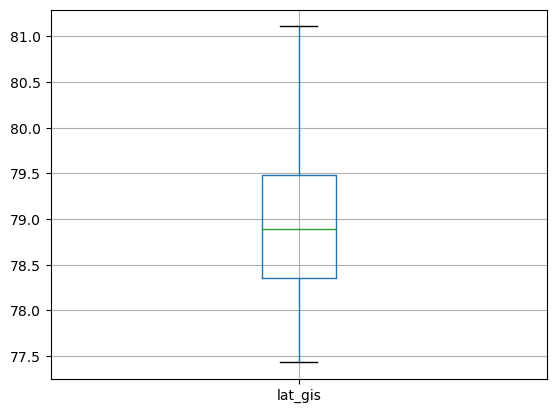

In [10]:
ground_water_df.boxplot(column=['lat_gis'])

#### Longitude (long_gis)

<Axes: >

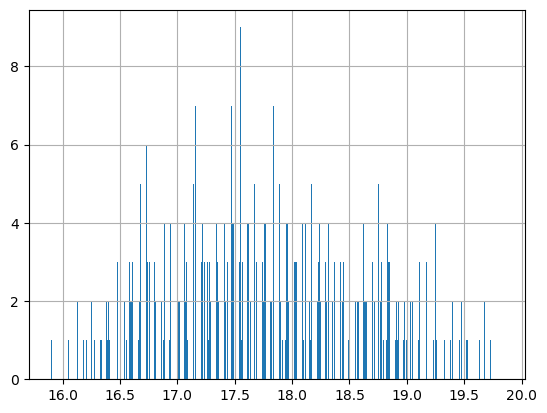

In [11]:
ground_water_df['long_gis'].hist(bins = 1000)

<Axes: >

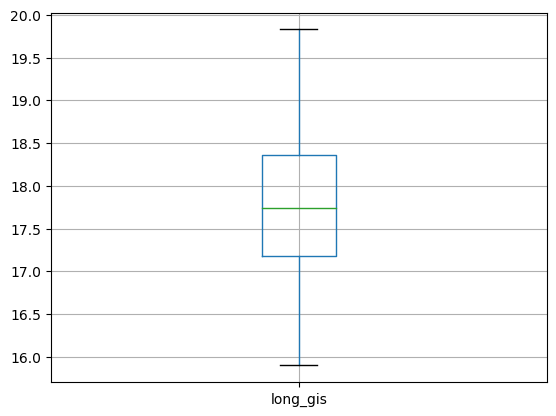

In [12]:
ground_water_df.boxplot(column=['long_gis'])

#### Ground Water Level (gwl)

In [13]:
ground_water_df['RL_GIS'].hist(bins = 1000)

<Axes: >

In [14]:
ground_water_df.boxplot(column=['RL_GIS'])

<Axes: >

#### pH

<Axes: >

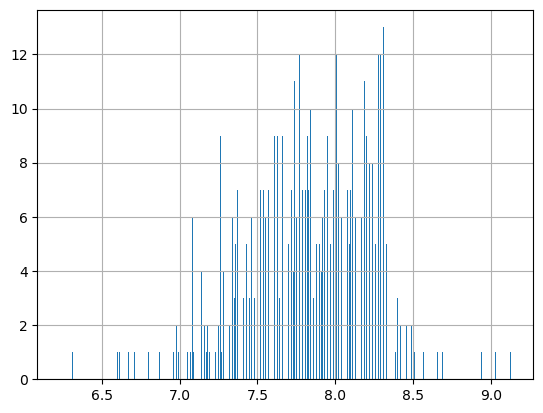

In [15]:
ground_water_df['pH'].hist(bins = 1000)

<Axes: >

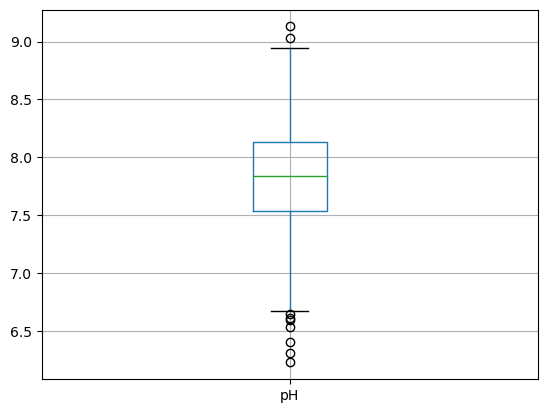

In [16]:
ground_water_df.boxplot(column=['pH'])

#### Electrical Conductivity (E.C)

<Axes: >

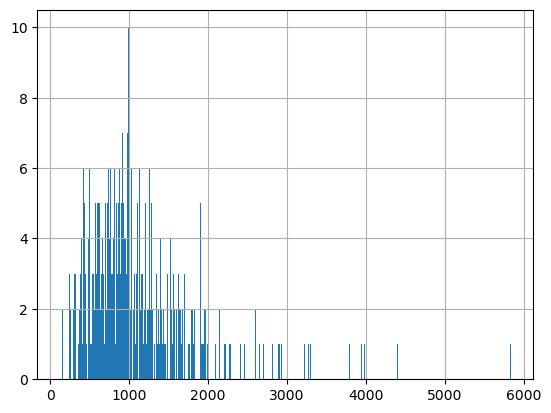

In [17]:
ground_water_df['E.C'].hist(bins = 1000)

<Axes: >

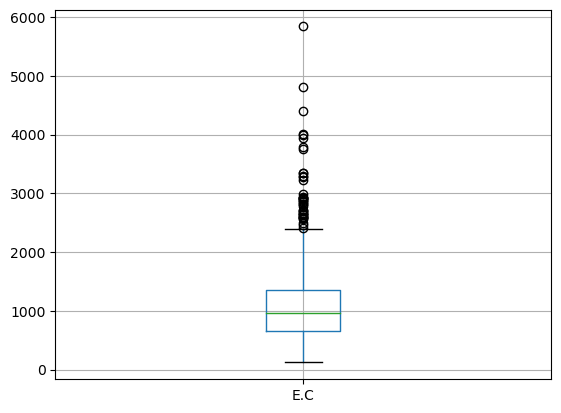

In [18]:
ground_water_df.boxplot(column=['E.C'])

#### Total Dissolved Solids (TDS)

<Axes: >

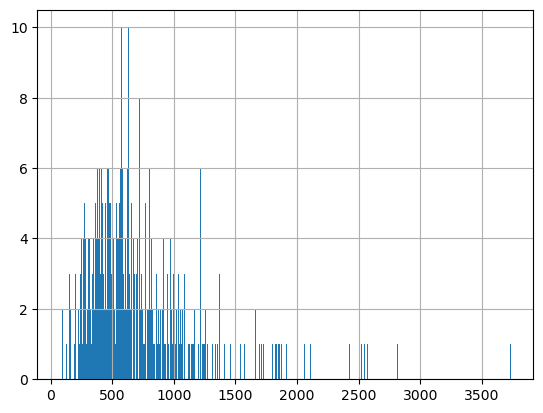

In [19]:
ground_water_df['TDS'].hist(bins = 1000)

In [20]:
ground_water_df.boxplot(column=['TDS'])

<Axes: >

#### Carbonate Present (CO3)

In [21]:
ground_water_df['CO3'].hist(bins = 200)

<Axes: >

<Axes: >

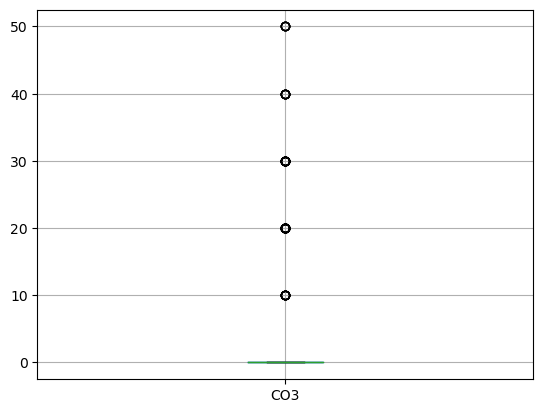

In [22]:
ground_water_df.boxplot(column=['CO3'])

#### Bicarbonate Present (HCO3)

<Axes: >

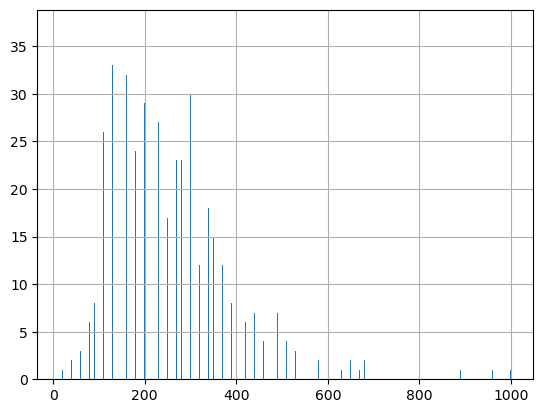

In [23]:
ground_water_df['HCO3'].hist(bins = 1000)

<Axes: >

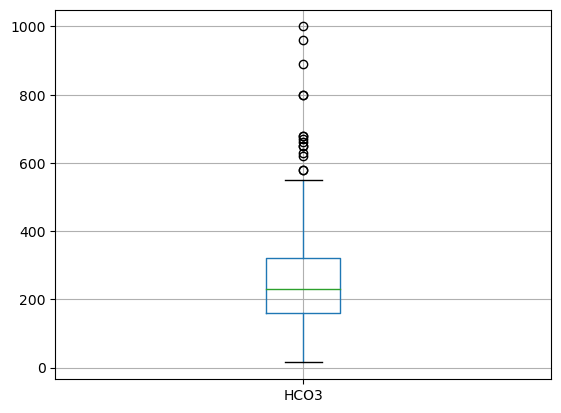

In [24]:
ground_water_df.boxplot(column=['HCO3'])

#### Chloride Present (Cl)

<Axes: >

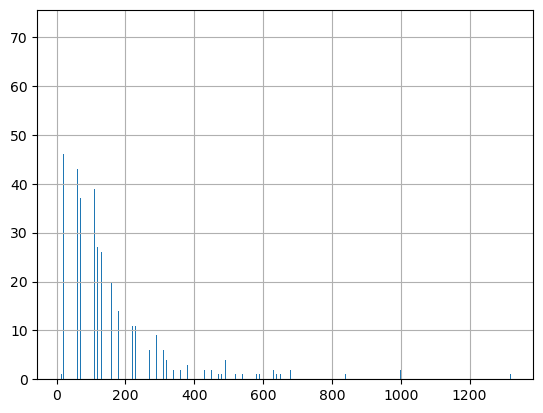

In [25]:
ground_water_df['Cl'].hist(bins = 1000)

<Axes: >

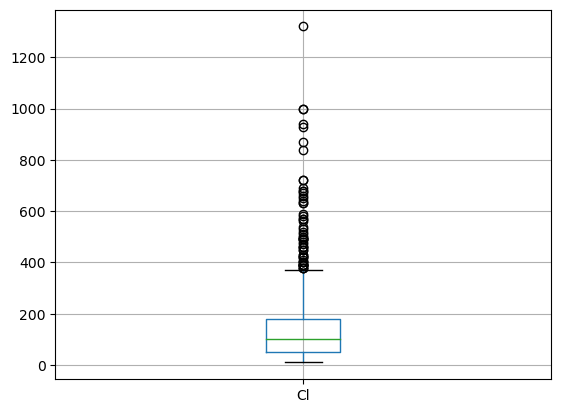

In [26]:
ground_water_df.boxplot(column=['Cl'])

#### Flouride Present (F)

<Axes: >

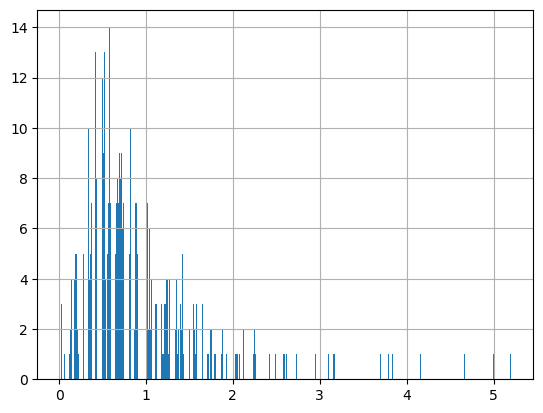

In [27]:
ground_water_df['F'].hist(bins = 1000)

<Axes: >

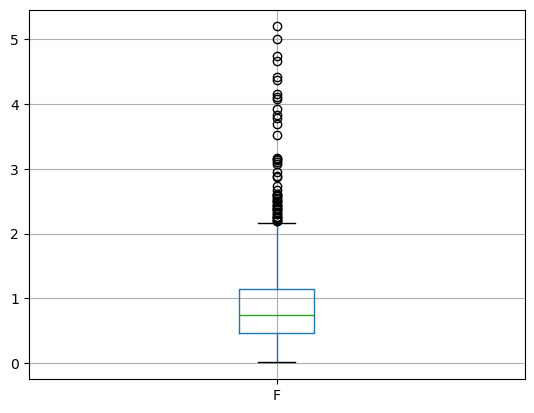

In [28]:
ground_water_df.boxplot(column=['F'])

#### Nitrate Present (NO3)

<Axes: >

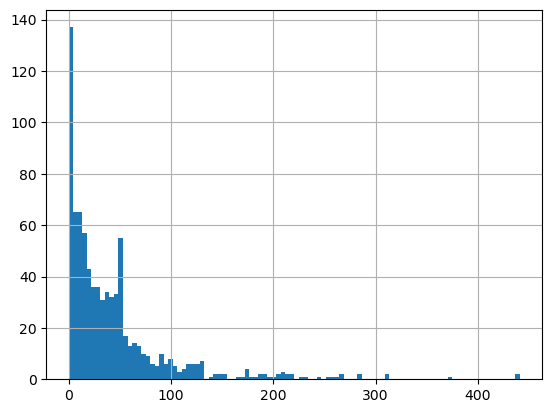

In [29]:
ground_water_df['NO3'].hist(bins = 100)

<Axes: >

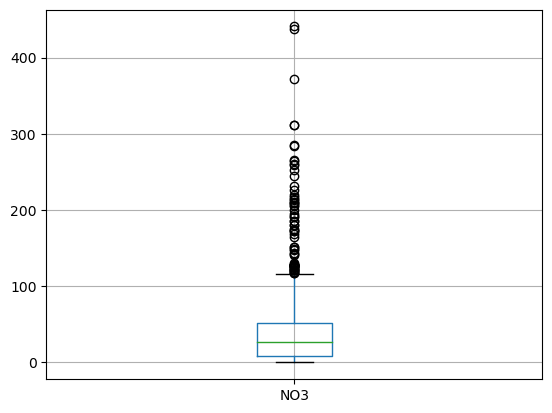

In [30]:
ground_water_df.boxplot(column=['NO3'])

#### Sulphate Present (SO4)

<Axes: >

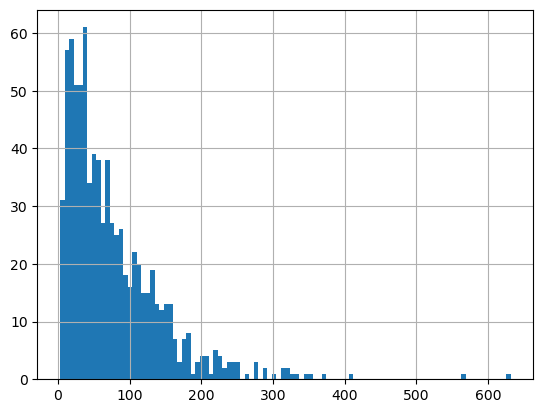

In [31]:
ground_water_df['SO4'].hist(bins = 100)

<Axes: >

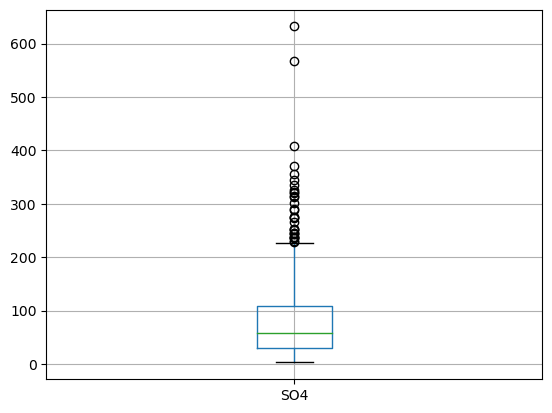

In [32]:
ground_water_df.boxplot(column=['SO4'])

#### Sodium Present (Na)

<Axes: >

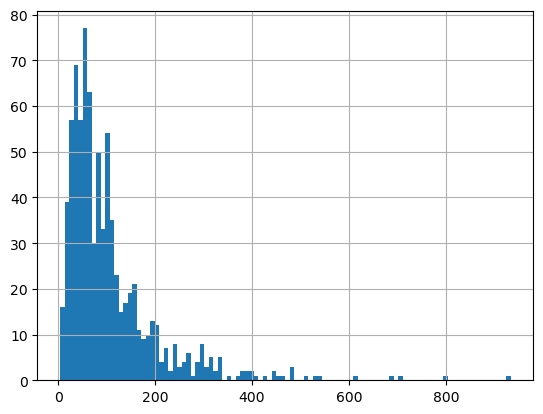

In [33]:
ground_water_df['Na'].hist(bins = 100)

<Axes: >

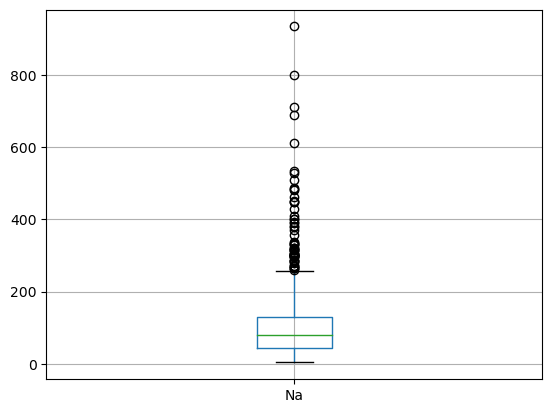

In [34]:
ground_water_df.boxplot(column=['Na'])

#### Potassium Present (K)

<Axes: >

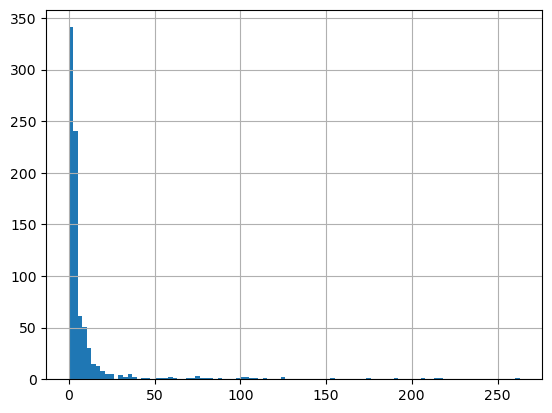

In [35]:
ground_water_df['K'].hist(bins = 100)

<Axes: >

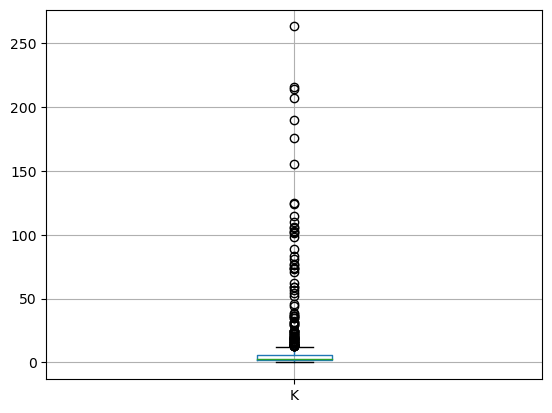

In [36]:
ground_water_df.boxplot(column=['K'])

#### Calcium Present (Ca)

<Axes: >

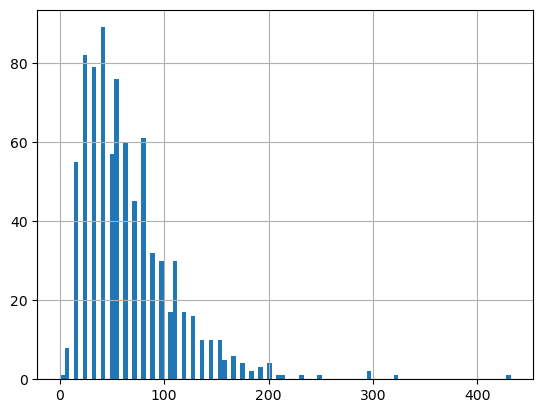

In [37]:
ground_water_df['Ca'].hist(bins = 100)

<Axes: >

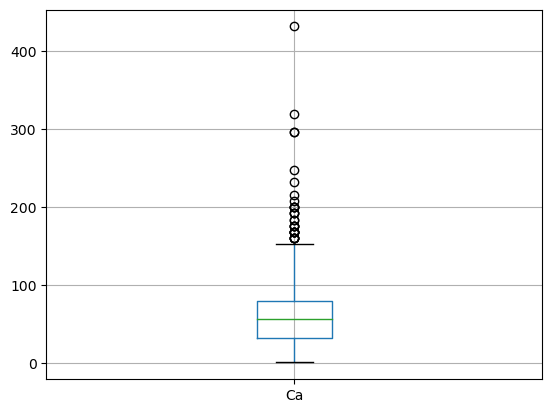

In [38]:
ground_water_df.boxplot(column=['Ca'])

#### Magnessium Present (Mg)

<Axes: >

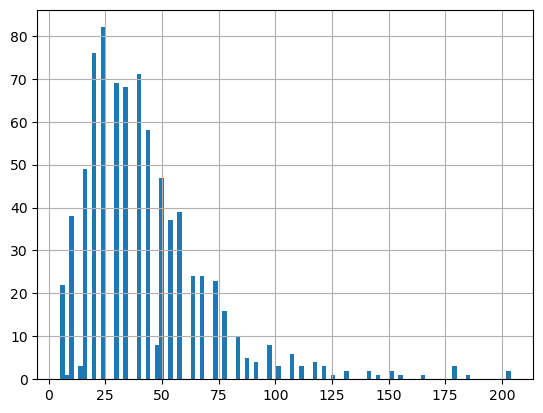

In [39]:
ground_water_df['Mg'].hist(bins = 100)

<Axes: >

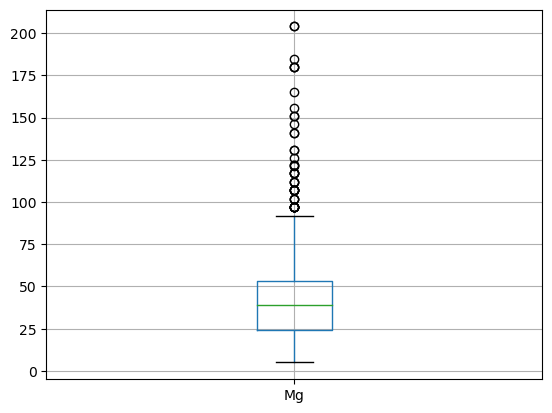

In [40]:
ground_water_df.boxplot(column=['Mg'])

#### Total Hardness (T.H)

In [41]:
ground_water_df['T.H'].hist(bins = 100)

<Axes: >

<Axes: >

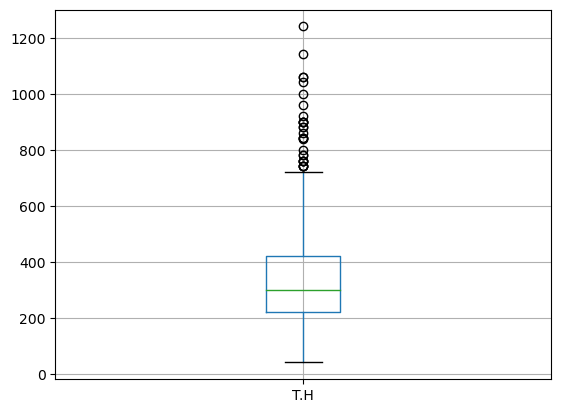

In [42]:
ground_water_df.boxplot(column=['T.H'])

#### Sodium Adsoption Ratio (SAR)

<Axes: >

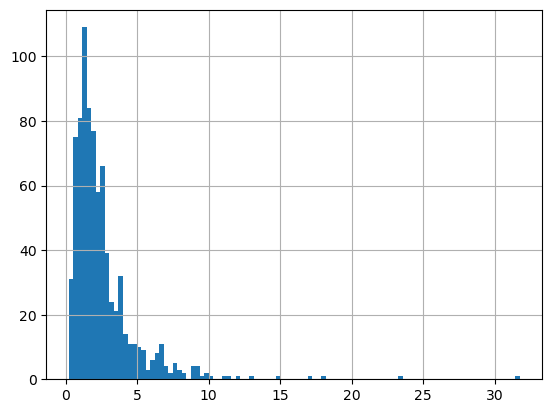

In [43]:
ground_water_df['SAR'].hist(bins = 100)

<Axes: >

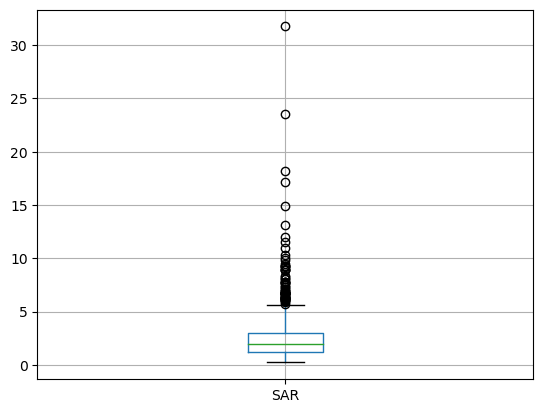

In [44]:
ground_water_df.boxplot(column=['SAR'])

#### Residual Sodium Carbonate (RSC)

<Axes: >

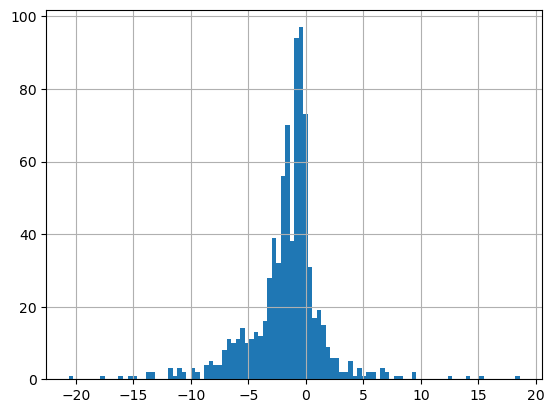

In [45]:
ground_water_df['RSC'].hist(bins = 100)

<Axes: >

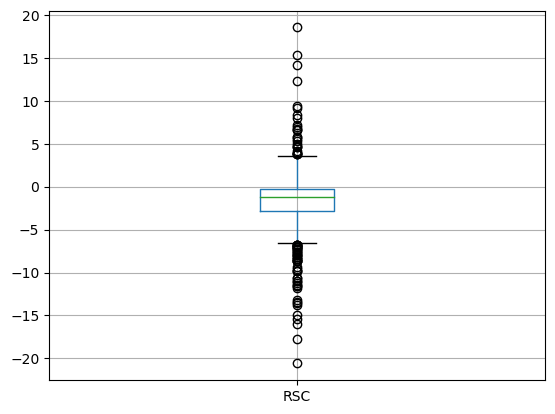

In [46]:
ground_water_df.boxplot(column=['RSC'])

## Outlier Treatment: Flooring (25th Percentile) and Capping (75th Percentile)

In [47]:
for num in numeric:
    Q1 = ground_water_df[num].quantile(0.25)
    Q3 = ground_water_df[num].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    ground_water_df[num]=np.where(ground_water_df[num]>upper_whisker,upper_whisker,np.where(ground_water_df[num]<lower_whisker,lower_whisker,ground_water_df[num]))

<Axes: >

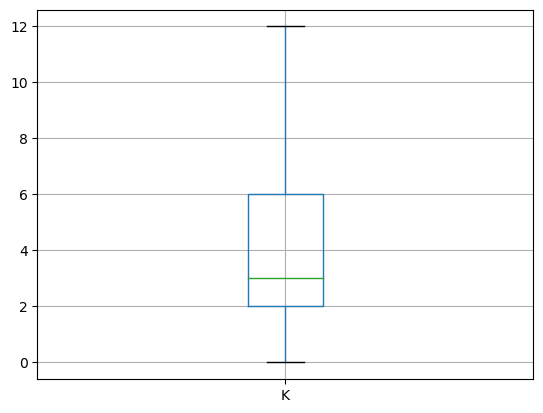

In [48]:
ground_water_df.boxplot(column=['K'])

<Axes: >

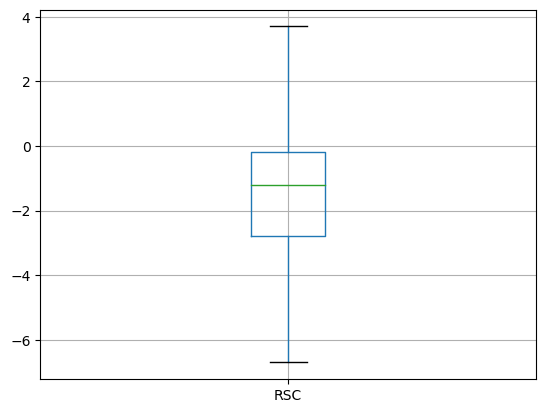

In [49]:
ground_water_df.boxplot(column=['RSC'])

## Data Validation

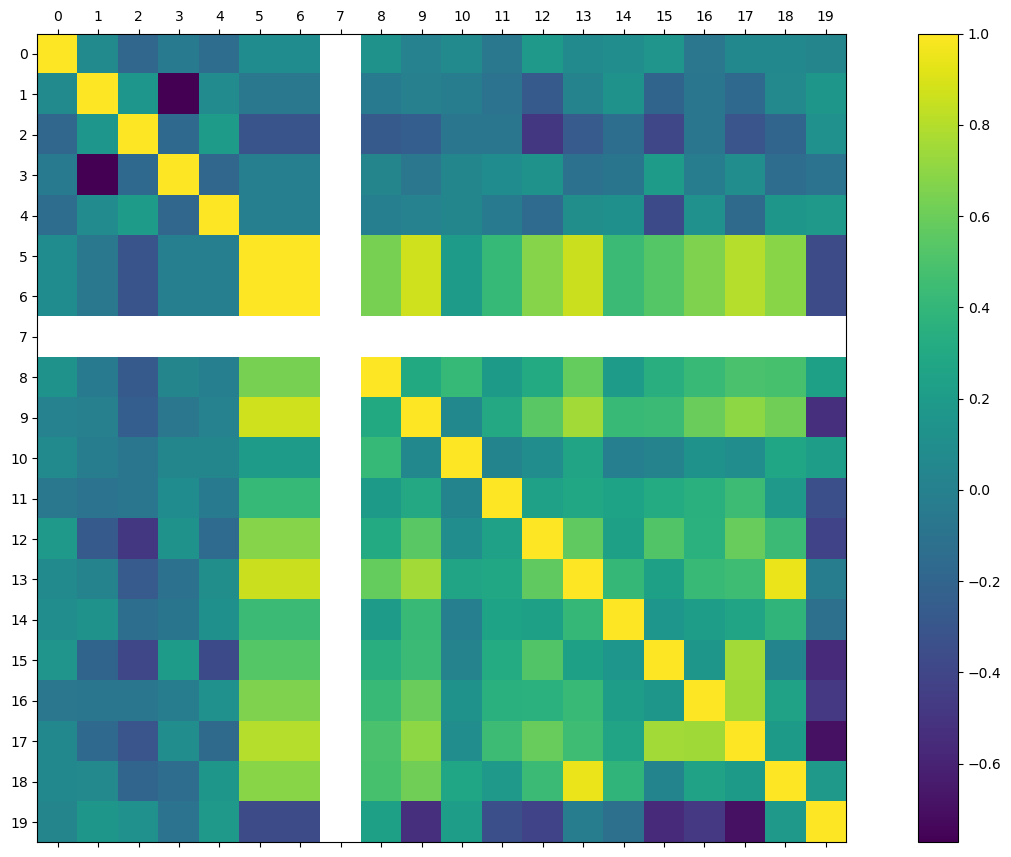

In [50]:
figure = plt.figure()
axes = figure.add_subplot(111)

# using the matshow() function 
caxes = axes.matshow(ground_water_df[numeric].corr(), interpolation='nearest')
figure.colorbar(caxes)

numeric_list = list(numeric)

# Set tick locations and labels explicitly
axes.set_xticks(range(len(numeric_list)))
axes.set_yticks(range(len(numeric_list)))

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.savefig('correlation_mat.png')
plt.show()

mat = ground_water_df[numeric].corr()

C:\Users\Brayan Gutierrez\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


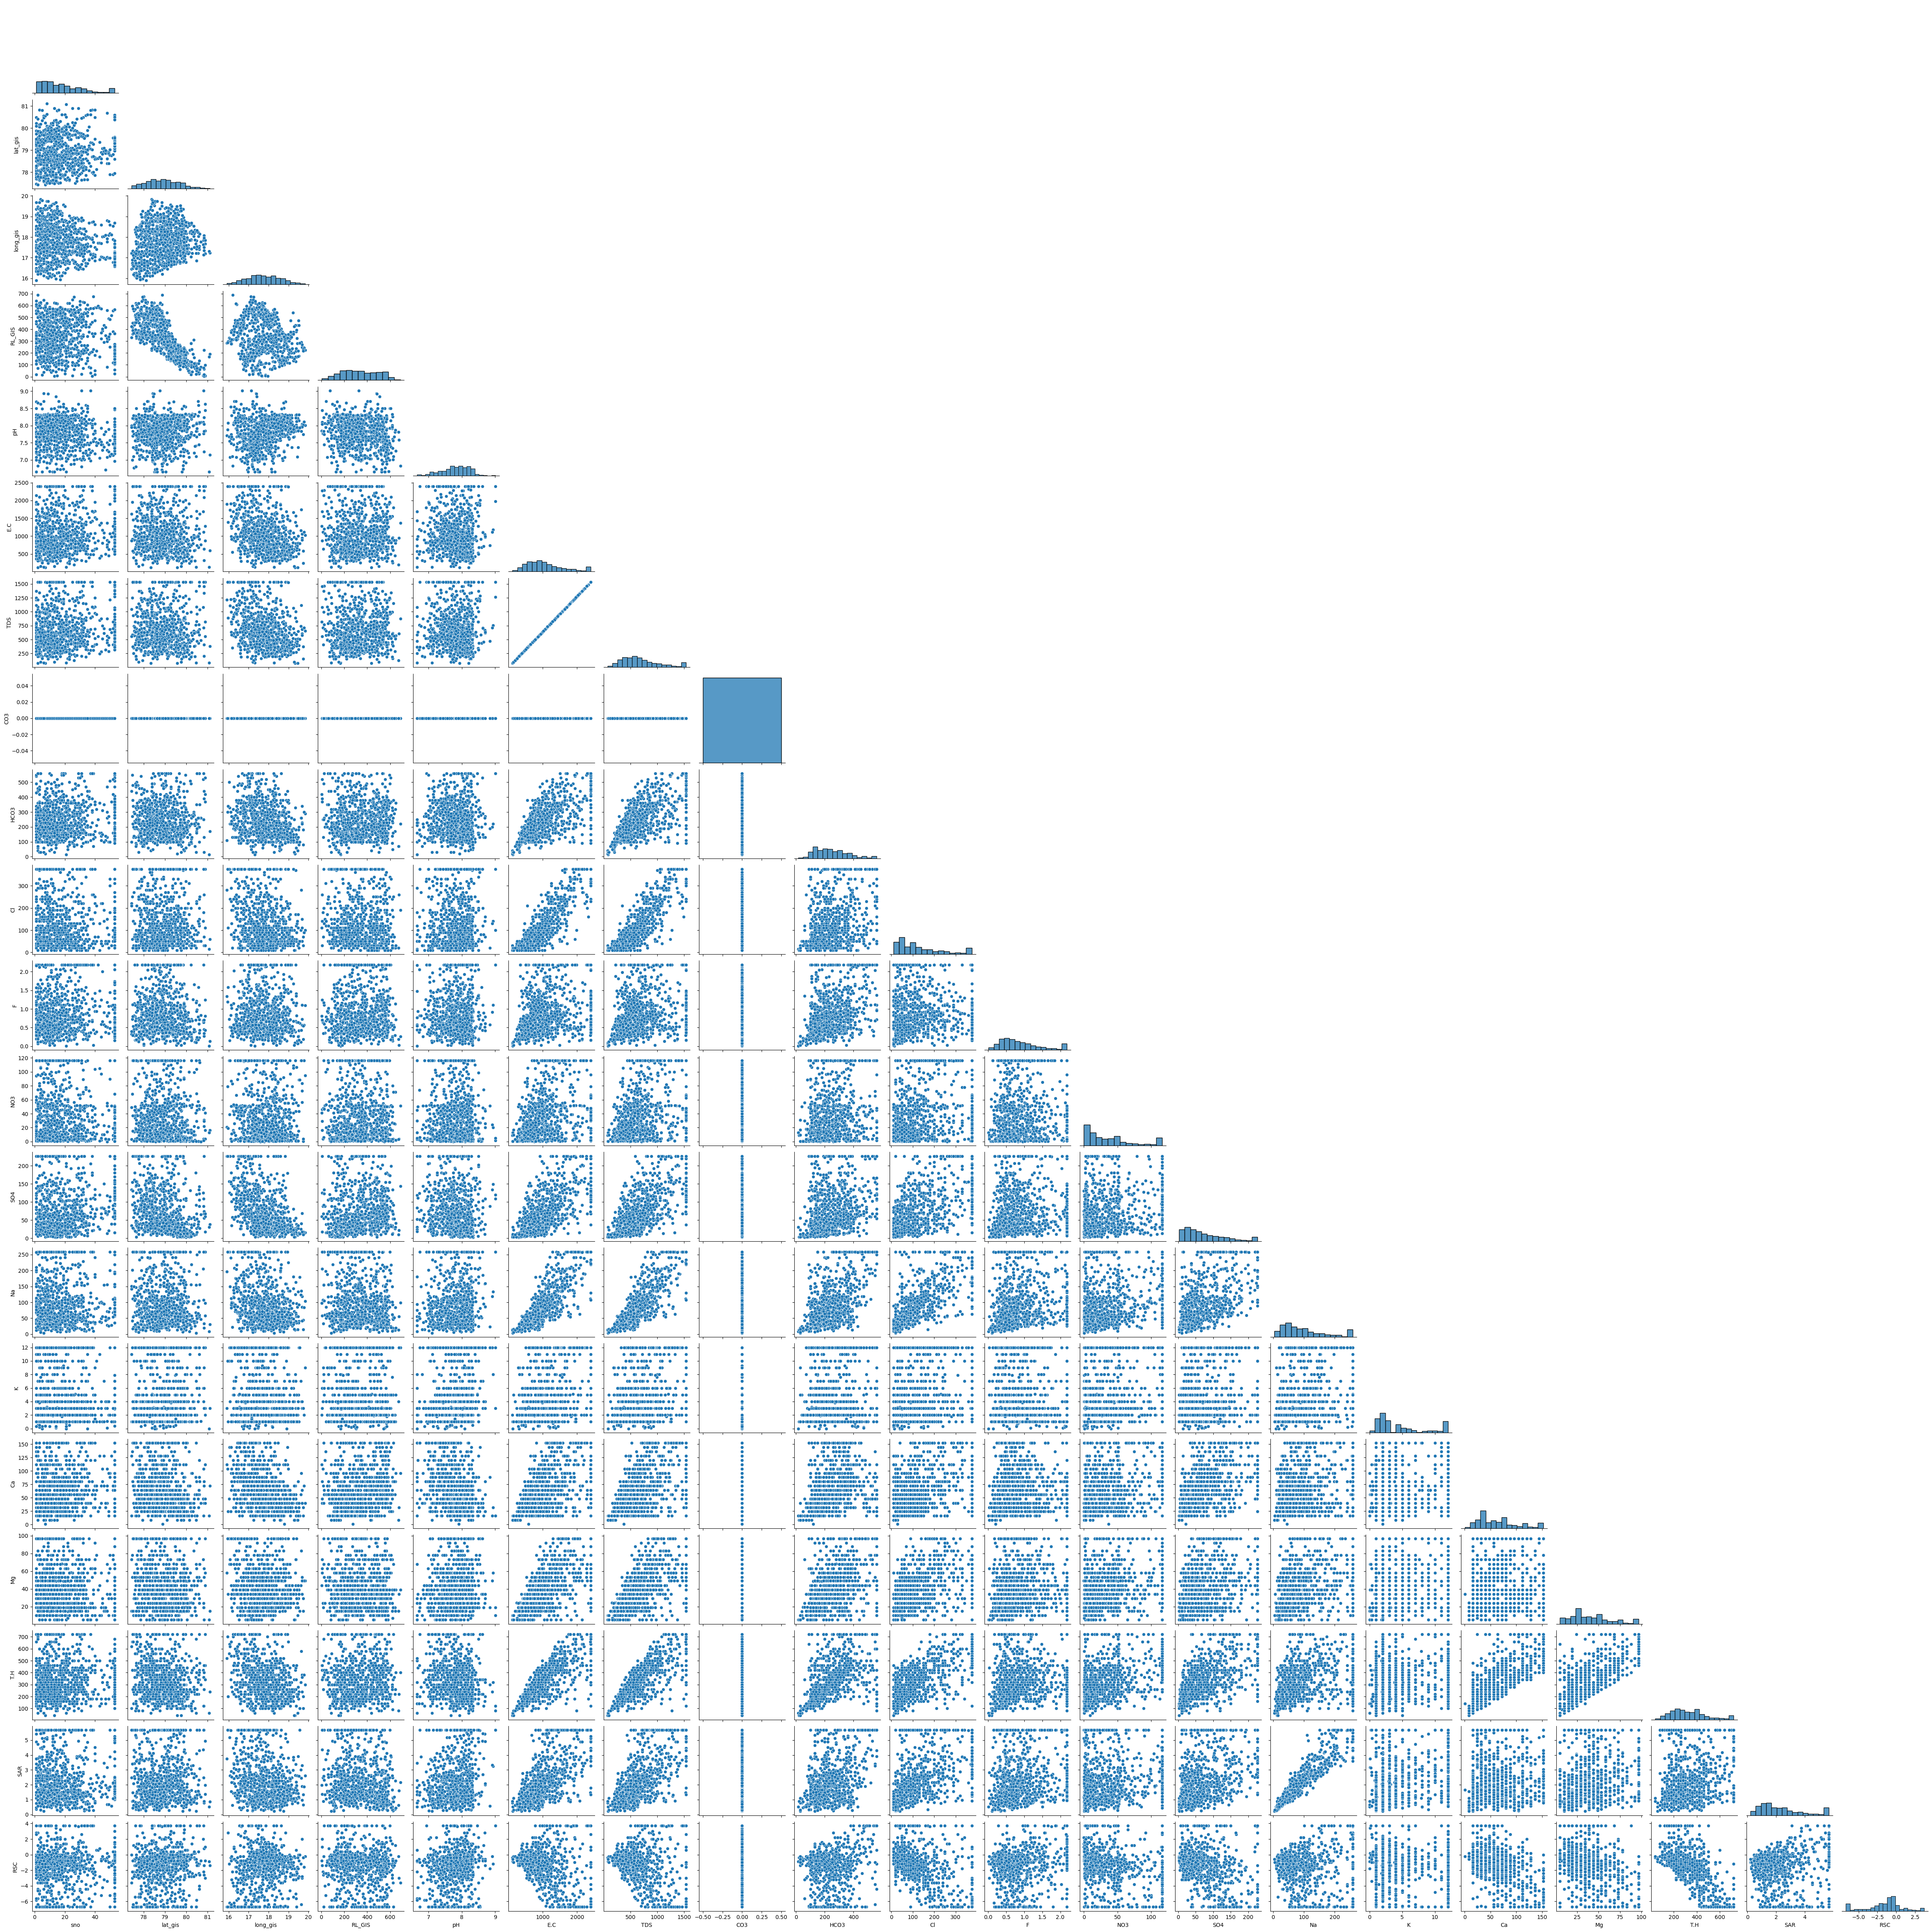

In [51]:
sns.pairplot(ground_water_df[numeric], corner=True)
plt.savefig('Numeric Correlation Plots.png')

## Unnecessary Data

In [52]:
num_rows = len(ground_water_df)

for col in ground_water_df.columns:
    cnts = ground_water_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

#deleted the season column
ground_water_df = ground_water_df.drop(columns=['season'])
new_nonnumeric = ground_water_df.select_dtypes(exclude=['number']).columns

# Removing CO3
ground_water_df = ground_water_df.drop(columns=['CO3'])
new_numeric = ground_water_df.select_dtypes(include=['number']).columns

season: 100.00%
season
Post-monsoon 2021    817
Name: count, dtype: int64

CO3: 100.00%
CO3
0.0    817
Name: count, dtype: int64



In [53]:
print(new_nonnumeric)

Index(['district', 'mandal', 'village', 'Classification', 'Classification.1'], dtype='object')


In [54]:
ground_water_df[ground_water_df.duplicated()]

Empty DataFrame
Columns: [sno, district, mandal, village, lat_gis, long_gis, RL_GIS, pH, E.C, TDS, HCO3, Cl, F, NO3, SO4, Na, K, Ca, Mg, T.H, SAR, Classification, RSC, Classification.1]
Index: []

[0 rows x 24 columns]

# Feature Selection
***

In [55]:
# Standardizing Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ground_water_df[new_numeric])

ground_water_df[new_numeric] = scaled_data

ground_water_df[new_numeric].info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 1023
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sno       817 non-null    float64
 1   lat_gis   817 non-null    float64
 2   long_gis  817 non-null    float64
 3   RL_GIS    817 non-null    float64
 4   pH        817 non-null    float64
 5   E.C       817 non-null    float64
 6   TDS       817 non-null    float64
 7   HCO3      817 non-null    float64
 8   Cl        817 non-null    float64
 9   F         817 non-null    float64
 10  NO3       817 non-null    float64
 11  SO4       817 non-null    float64
 12  Na        817 non-null    float64
 13  K         817 non-null    float64
 14  Ca        817 non-null    float64
 15  Mg        817 non-null    float64
 16  T.H       817 non-null    float64
 17  SAR       817 non-null    float64
 18  RSC       817 non-null    float64
dtypes: float64(19)
memory usage: 127.7 KB


## Numerical Input → Categorical Output
#### ANOVA

In [56]:
# Numerical Inputs
X = ground_water_df[new_numeric]
# Categorical Output
y = ground_water_df['Classification.1']

In [57]:
# Splitting Data 60% Training 40% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(571, 19) (571,)
(246, 19) (246,)


Feature 0: 2.411755
Feature 1: 0.578077
Feature 2: 2.270130
Feature 3: 0.621738
Feature 4: 5.024054
Feature 5: 14.314866
Feature 6: 14.321262
Feature 7: 78.760572
Feature 8: 0.616207
Feature 9: 27.124318
Feature 10: 1.057672
Feature 11: 3.077665
Feature 12: 52.362448
Feature 13: 2.454519
Feature 14: 10.676035
Feature 15: 1.654469
Feature 16: 8.359669
Feature 17: 88.609453
Feature 18: 112.870402


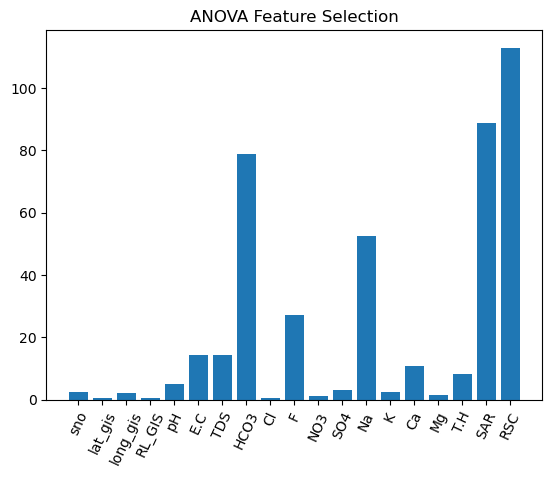

In [58]:
# ANOVA Feature Selection
fs = SelectKBest(score_func = f_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
idx = np.arange(len(new_numeric))
labels = ground_water_df[new_numeric][:len(new_numeric)]

plt.bar(idx, fs.scores_)
plt.xticks(idx, labels, rotation=65)  # Rotate labels if needed
plt.title("ANOVA Feature Selection")
plt.savefig('ANOVA.png')
plt.show()

#### Mutual Information Feature Selection

Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.010021
Feature 3: 0.000000
Feature 4: 0.051890
Feature 5: 0.025384
Feature 6: 0.020087
Feature 7: 0.094387
Feature 8: 0.000000
Feature 9: 0.041822
Feature 10: 0.016582
Feature 11: 0.002961
Feature 12: 0.088738
Feature 13: 0.009522
Feature 14: 0.031249
Feature 15: 0.003237
Feature 16: 0.011347
Feature 17: 0.118785
Feature 18: 0.331285


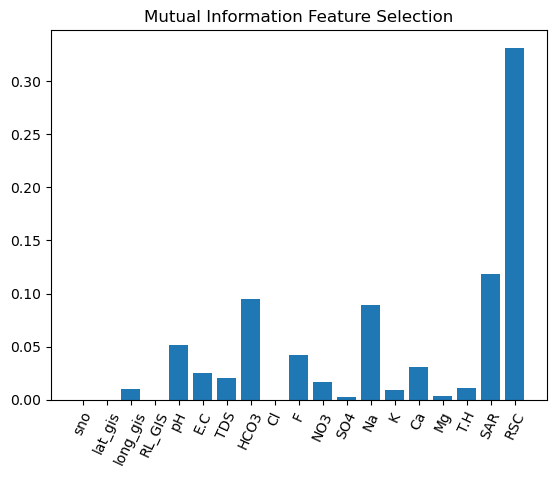

In [59]:
# Mutual Information Feature Selection
fs = SelectKBest(score_func = mutual_info_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
idx = np.arange(len(new_numeric))
labels = ground_water_df[new_numeric][:len(new_numeric)]

plt.bar(idx, fs.scores_)
plt.xticks(idx, labels, rotation=65)  # Rotate labels if needed
plt.title("Mutual Information Feature Selection")
plt.savefig('info.png')
plt.show()

#### Recursive Feature Elimination (RFE) Method

In [60]:
# Create a dataset with features (X) and target variable (y)
X = ground_water_df[new_numeric]
y = ground_water_df['Classification.1']

# Create a base model for feature elimination
model = LogisticRegression()

# Create the RFE object with the base model
rfe = RFE(estimator=model, n_features_to_select=5)  # specify the number of features to select

# Fit RFE to the data
rfe.fit(X, y)

# Get the rankings of features
ranked_features = rfe.ranking_

# Print the ranked features
for feature_rank, feature_name in sorted(zip(ranked_features, X.columns)):
    print("Feature:", feature_name, "Rank:", feature_rank)

Feature: Ca Rank: 1
Feature: HCO3 Rank: 1
Feature: RSC Rank: 1
Feature: SAR Rank: 1
Feature: T.H Rank: 1
Feature: Mg Rank: 2
Feature: TDS Rank: 3
Feature: Cl Rank: 4
Feature: Na Rank: 5
Feature: NO3 Rank: 6
Feature: lat_gis Rank: 7
Feature: RL_GIS Rank: 8
Feature: E.C Rank: 9
Feature: SO4 Rank: 10
Feature: long_gis Rank: 11
Feature: pH Rank: 12
Feature: sno Rank: 13
Feature: F Rank: 14
Feature: K Rank: 15


#### Chi Square

Feature 0: 36.559843
Feature 1: 13.090356
Feature 2: 298.368981
Feature 3: 71.342559
Feature 4: 161.672163
Feature 5: 1339.275517
Feature 6: 1233.481153
Feature 7: 1047.809357
Feature 8: 6.748537
Feature 9: 1650.533063
Feature 10: 66.976302
Feature 11: 35.892820
Feature 12: 2538.370142
Feature 13: 50.070838
Feature 14: 73.543648
Feature 15: 9.981368
Feature 16: 193.844063
Feature 17: 5160.849049
Feature 18: 2142.639937


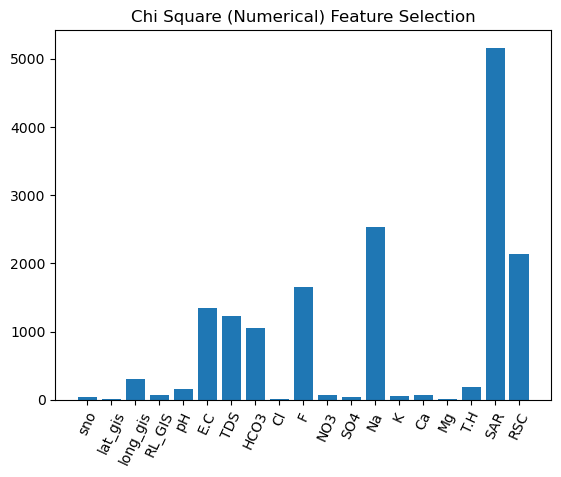

In [61]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

#chi squared with numeric features
X = ground_water_df[new_numeric]
y = ground_water_df['Classification.1']

X = X.astype(str)
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
idx = np.arange(len(new_numeric))
labels = ground_water_df[new_numeric][:len(new_numeric)]

plt.bar(idx, fs.scores_)
plt.xticks(idx, labels, rotation=65)  # Rotate labels if needed
plt.title("Chi Square (Numerical) Feature Selection")
plt.savefig('CSnum.png')
plt.show()

## Categorical Input → Categorical Output

#### Chi Square

Feature 0: 4.111736
Feature 1: 401.197109
Feature 2: 454.765318
Feature 3: 29.721566


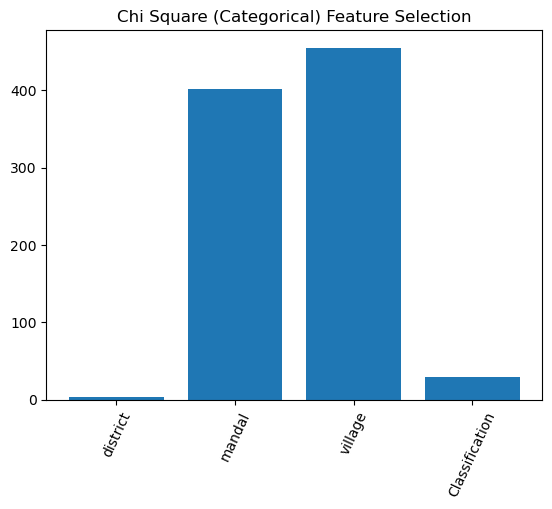

In [62]:
#chi squared with non-numeric features
features = ['district', 'mandal','village', 'Classification']
X = ground_water_df[features]
y = ground_water_df['Classification.1']

X = X.astype(str)
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
idx = np.arange(len(features))
labels = ground_water_df[new_numeric][:4]

plt.bar(idx, fs.scores_)
plt.xticks(idx, features, rotation=65)
plt.title("Chi Square (Categorical) Feature Selection")
plt.savefig('CScat.png')
plt.show()

# Principal Component Analysis
***

In [63]:
chosen_features = ['RSC', 'SAR', 'Na', 'HCO3', 'E.C', 'TDS', 'F', 'pH', 'mandal', 'village', 'Classification.1']

working_gw_df = ground_water_df[chosen_features]
working_gw_df.head()

working_numeric = working_gw_df.select_dtypes(include=['number']).columns
working_nonnumeric = working_gw_df.select_dtypes(exclude=['number']).columns

working_gw_df[working_numeric]

RSC       SAR        Na      HCO3       E.C       TDS         F  \
0    -0.585459 -0.280348 -0.183791 -0.157500 -0.006796 -0.005646 -0.289187   
1     0.496198 -1.025176 -1.198847 -1.777157 -1.738824 -1.739070 -1.469972   
2     1.494650  0.665784  0.287996  0.780196 -0.227203 -0.226629 -0.561676   
3     0.579402  0.196073  0.087844  0.353971 -0.074755 -0.074524  0.382952   
4    -0.003028 -0.300479 -0.198087  0.439216  0.075856  0.074711 -0.561676   
...        ...       ...       ...       ...       ...       ...       ...   
1019  0.745811  1.008003  0.917045  0.865441  0.400956  0.401881  1.182252   
1020 -2.123028  0.900640  1.874915  1.121176  2.232167  2.232881 -0.307353   
1021 -2.123028  1.330090  2.303813  0.098235  2.439716  2.439514 -0.543510   
1022  0.829015 -0.729929 -0.798543 -0.072255 -1.026176 -1.027333  2.372119   
1023  0.412994 -1.078857 -0.955805  0.694951 -0.767199 -0.766171  0.019633   

            pH  
0     0.558173  
1     0.959698  
2     0.440077  
3     0.487315  
4     0.723507  
...        ...  
1019  0.605411  
1020 -1.425837  
1021 -0.858977  
1022  0.487315  
1023 -1.567552  

[817 rows x 8 columns]

#### 2 Principal Components

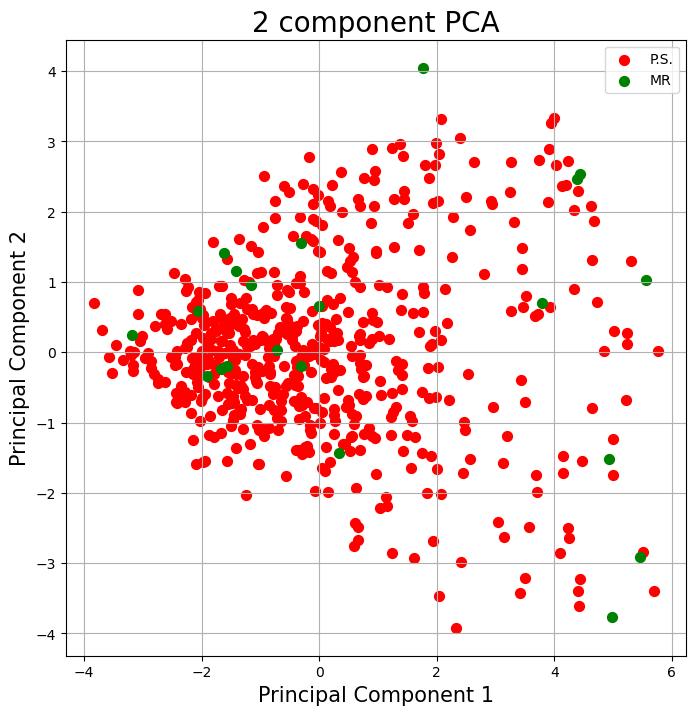

0.7085923880821992


In [64]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(working_gw_df[working_numeric])

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, working_gw_df[['Classification.1']]], axis = 1)

principalComponents = pca.fit_transform(working_gw_df[working_numeric])

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, working_gw_df[['Classification.1']]], axis=1)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

targets = finalDf['Classification.1'].unique()

colors = ['r', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Classification.1'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50,
               label=target)

ax.legend()
ax.grid()
plt.savefig('1 PCA.png')
plt.show()

print(sum(pca.explained_variance_ratio_))

#### 3 Principal Components

In [65]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(working_gw_df[working_numeric])

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3'])  # Include the third principal component


In [66]:
finalDf = pd.concat([principalDf, working_gw_df[['Classification.1']]], axis = 1)
print(finalDf)

      principal component 1  principal component 2  principal component 3  \
0                 -0.274663               0.447957              -0.579199   
1                 -3.521850              -0.293233              -1.511448   
2                  0.328903              -1.427340              -0.442395   
3                  0.243350              -0.890704              -0.126026   
4                 -0.068960              -0.019720              -0.613346   
...                     ...                    ...                    ...   
1019                    NaN                    NaN                    NaN   
1020                    NaN                    NaN                    NaN   
1021                    NaN                    NaN                    NaN   
1022                    NaN                    NaN                    NaN   
1023                    NaN                    NaN                    NaN   

     Classification.1  
0                P.S.  
1                P.S.  
2  

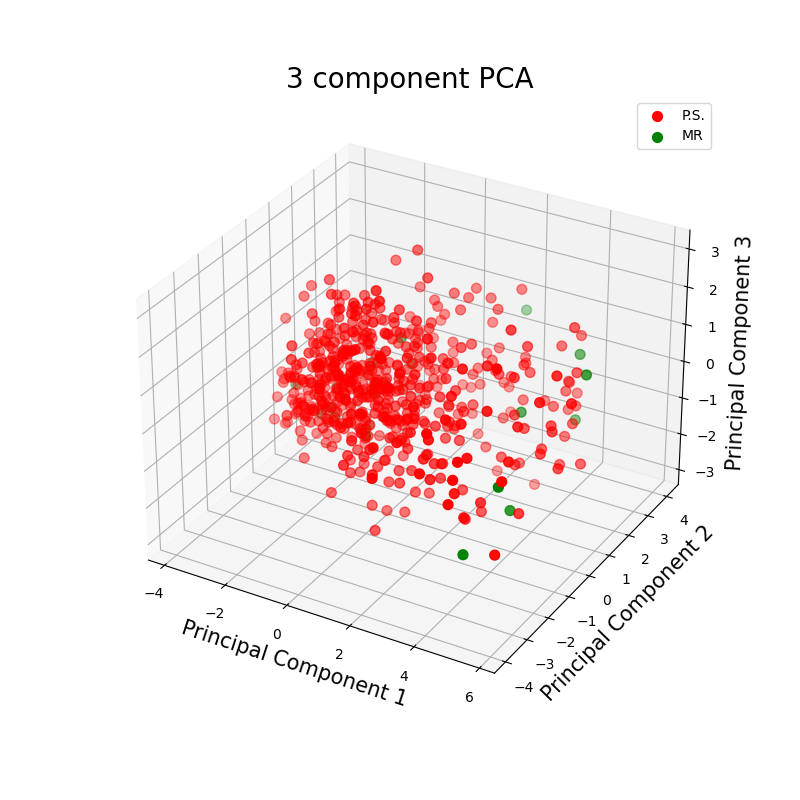

In [67]:
%matplotlib widget

principalComponents = pca.fit_transform(working_gw_df[working_numeric])

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3'])  # Include the third principal component

finalDf = pd.concat([principalDf, working_gw_df[['Classification.1']]], axis=1)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')  # Use 3D projection
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
ax.set_title('3 component PCA', fontsize=20)

targets = finalDf['Classification.1'].unique()

colors = ['r', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Classification.1'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               finalDf.loc[indicesToKeep, 'principal component 3'],  # Include the third principal component
               c=color,
               s=50,
               label=target)

ax.legend()
ax.grid()
plt.savefig('3 PCA.png')
plt.show()

In [68]:
print(sum(pca.explained_variance_ratio_))

0.8365851297894925
